# VapoRock
* A thermodynamic model for vaporized silicate rocks & melts relevant to magma ocean atmospheres and stellar nebula

In [1]:
#Import modules
import vaporock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
from thermoengine import model

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See http

Define the compostion of the melt in terms of oxides

In [3]:

# BSE composition from Schaefer & Fegley (Ti and Ch species neglected)
melt_comp_wts = {'SiO2':45.97, 'MgO':36.66, 'Al2O3':4.77, 'FeO':8.24, 
                 'CaO':3.78, 'Na2O':0.35, 'K2O':0.04}

Now, calculate the corresponding melt compostion is calculated using MELTS from thermoengine after the mantle has been melted

In [4]:
system = vaporock.System(vapor_database='JANAF0')
# system = vaporock.System(vapor_database='LAMOR')
system.set_melt_comp(melt_comp_wts)
system.print_melt_comp()

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See http

MELTS liquid components:


/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


[('SiO2', 0.17905092548091792),
 ('TiO2', 0.0),
 ('Al2O3', 0.046357815686249346),
 ('Fe2O3', 0.0),
 ('MgCr2O4', 0.0),
 ('Fe2SiO4', 0.057344557277748086),
 ('MnSi0.5O2', 0.0),
 ('Mg2SiO4', 0.4547890552892488),
 ('NiSi0.5O2', 0.0),
 ('CoSi0.5O2', 0.0),
 ('CaSiO3', 0.0674044301472555),
 ('Na2SiO3', 0.00564707947570578),
 ('KAlSiO4', 0.0008492983733812904),
 ('Ca3(PO4)2', 0.0),
 ('H2O', 0.0)]

In [5]:
T = np.linspace(1500,3000,101)
P = 1e-10 #In bars, intital surface pressure
buffer = 'IW' # Iron-Wusite buffer
DlogfO2 = +1.5
DlogfO2 = -1.5
g=36.2
logfO2 = vaporock.redox_buffer(T, buffer=buffer, dlogfO2=DlogfO2) #Oxygen fugacity for given temperature range and Pressure

# Optionally choose calculation method based on chemical potentials, both agree (method=['activity','chempot'])
logP, lnK, lna =  system.eval_gas_abundances(T, logfO2, full_output=True, method='activity')
print(logP)

density = system.calc_column_density(logP, logfO2, g)
density_high = system.get_abundant_species(density, N=20)
mol_elem_frac, Ptotal = system.calc_gas_props(T, logP)




/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

                 1500.0     1515.0     1530.0     1545.0     1560.0  \
species_name                                                          
O(g)         -11.943176 -11.764964 -11.590276 -11.419010 -11.251067   
O2(g)        -13.101927 -12.920790 -12.743291 -12.569323 -12.398783   
Mg(g)         -8.598675  -8.435417  -8.275599  -8.119119  -7.965879   
MgO(g)       -13.822638 -13.595177 -13.372401 -13.154172 -12.940359   
Mg2(g)       -20.776958 -20.461087 -20.151993 -19.849474 -19.553334   
Ca(g)        -14.810952 -14.602668 -14.398698 -14.198913 -14.003190   
CaO(g)       -18.877084 -18.614661 -18.358117 -18.107251 -17.861874   
Ca2(g)       -32.430339 -32.025642 -31.629422 -31.241427 -30.861413   
Al(g)        -16.435111 -16.183119 -15.936190 -15.694176 -15.456933   
AlO(g)       -16.503225 -16.251780 -16.005420 -15.763995 -15.527359   
AlO2(g)      -21.070956 -20.779489 -20.493925 -20.214091 -19.939818   
Al2(g)       -31.880292 -31.435856 -31.000386 -30.573618 -30.155299   
Al2O(g

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

Change the fo2

In the above example fo2 was represnted by the pm 1.5 value, i want to explore a range of fo2 values so will start by doubling it

In [6]:
help(system.calc_gas_props)

Help on method calc_gas_props in module vaporock.equil:

calc_gas_props(T, logP) method of vaporock.equil.System instance



In [7]:
T1 = np.linspace(1500,3000,101) #Define the temperature range
P1 = 1e-10 #In bars, intital surface pressure
buffer = 'IW' # Iron-Wusite buffer
dlogfO2 = [-4,-3,-2,-1,0,1,2,3,4,5,6,7] #Define the fo2 values we calculate it for
g=9.81 #Define gravitional field strength in N/kg
LogfO21=np.zeros((len(T),len(dlogfO2))) #Define an array of logfo2 for each temperature and fo2 value
LOGP1 = np.zeros((len(T1),len(dlogfO2),34)) #Define an array of log(Partial_pressure) for the 34 vapor species
Ptotal1=np.zeros((len(T1),len(dlogfO2))) #Define an array of total pressure for the temperature and fo2 values
density1=np.zeros((len(T1),len(dlogfO2),34)) #Define an array of densities for the vapour species
density_high1=np.zeros((len(T1),len(dlogfO2),20)) #Define an array of densities for the liquid species
mol_elem_frac1=np.zeros((len(T1),len(dlogfO2),10)) #Define an array of the molar elemental fractions
AS =[]
for j in range(len(dlogfO2)): #Loop over the fo2 values
        logfO21 = vaporock.redox_buffer(T1, buffer=buffer, dlogfO2=dlogfO2[j]) #Oxygen fugacity for given temperature range and Pressure
        LogfO21[:,j]=logfO21 #Calculate and store the logfo2 values as an array
        #Calculate the Log(Partial_pressure), ln(activity) and ln()
        logP1, lnk1, lna1 =  system.eval_gas_abundances(T1, logfO21, full_output=True, method='activity')
        LOGP1a = np.array(logP1) 
        LOGP1aT= np.transpose(LOGP1a)
        LOGP1[:,j,:] = LOGP1aT #Store the Log(Partial_pressure) as an array
        CD=np.array(system.calc_column_density(logP1, logfO21, g))
        print(CD.shape)
        CDT=np.transpose(CD)
        density1[:,j,:] = CDT #Store the densities of the vapour species
        AS = (system.get_abundant_species(system.calc_column_density(logP1, logfO21, g), N=20))
        AST = np.transpose(AS)
        density_high1[:,j,:] = AST #Store the densities of the liqiud species 
        MEF ,PTOTAL = (system.calc_gas_props(T1, logP1))
        print(MEF)
        MEFA=np.array(MEF)
        MEFT = np.transpose(MEFA)
        print(MEFA.shape)
        mol_elem_frac1[:,j,:]=MEFT #Store the molar elemental fractions as an array
        Ptotal1[:,j]= np.array(np.sum(10**logP1, axis=0)) #Store the total pressures in an array
print('LOGP1a =' , LOGP1a.shape)
        

(101, 12) (101, 12, 34)
(101, 12, 10)
LOGP1 (101, 12, 34)


/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   3.370622e-03  3.992745e-03  4.710551e-03  5.535322e-03  6.479111e-03   
Mg  2.028866e-03  2.324868e-03  2.654085e-03  3.018790e-03  3.421217e-03   
Ca  1.244453e-09  1.581791e-09  1.999024e-09  2.512128e-09  3.139592e-09   
Al  1.307245e-10  1.837533e-10  2.563682e-10  3.550760e-10  4.882911e-10   
Si  3.367747e-03  3.989431e-03  4.706744e-03  5.530966e-03  6.474144e-03   
Na  8.608590e-01  8.533797e-01  8.455130e-01  8.372472e-01  8.285712e-01   
K   4.554190e-02  4.558310e-02  4.559034e-02  4.556263e-02  4.549902e-02   
Fe  8.483184e-02  9.073014e-02  9.682526e-02  1.031050e-01  1.095553e-01   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   7.554704e-03  8.775564e-03  1.015575e-02  1.17098

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   1.980095e-03  2.353439e-03  2.786430e-03  3.286684e-03  3.862476e-03   
Mg  1.189641e-03  1.367846e-03  1.567180e-03  1.789349e-03  2.036088e-03   
Ca  7.297018e-10  9.306633e-10  1.180396e-09  1.489052e-09  1.868512e-09   
Al  4.737119e-11  6.680509e-11  9.352803e-11  1.300143e-10  1.794871e-10   
Si  1.974747e-03  2.347252e-03  2.779298e-03  3.278490e-03  3.853094e-03   
Na  8.976233e-01  8.928543e-01  8.878177e-01  8.825006e-01  8.768895e-01   
K   4.748685e-02  4.769165e-02  4.787144e-02  4.802533e-02  4.815234e-02   
Fe  4.974535e-02  5.338556e-02  5.717796e-02  6.111958e-02  6.520647e-02   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   4.522759e-03  5.277160e-03  6.135976e-03  7.11015

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   1.147717e-03  1.366706e-03  1.621456e-03  1.916745e-03  2.257820e-03   
Mg  6.854433e-04  7.897357e-04  9.068002e-04  1.037762e-03  1.183789e-03   
Ca  4.204501e-10  5.373440e-10  6.830260e-10  8.636378e-10  1.086414e-09   
Al  1.972609e-11  2.786846e-11  3.909091e-11  5.445188e-11  7.533622e-11   
Si  1.137882e-03  1.355301e-03  1.608276e-03  1.901564e-03  2.240389e-03   
Na  9.197053e-01  9.166932e-01  9.135136e-01  9.101564e-01  9.066109e-01   
K   4.865506e-02  4.896501e-02  4.925699e-02  4.953036e-02  4.978444e-02   
Fe  2.866859e-02  3.083004e-02  3.309289e-02  3.545722e-02  3.792266e-02   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   2.650422e-03  3.100803e-03  3.615744e-03  4.20256

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   6.672904e-04  7.951949e-04  9.442056e-04  1.117210e-03  1.317397e-03   
Mg  3.908587e-04  4.508686e-04  5.183653e-04  5.940414e-04  6.786237e-04   
Ca  2.397755e-10  3.068091e-10  3.904948e-10  4.944370e-10  6.228985e-10   
Al  1.076539e-11  1.522179e-11  2.137089e-11  2.979795e-11  4.127044e-11   
Si  6.489931e-04  7.739326e-04  9.195785e-04  1.088775e-03  1.284669e-03   
Na  9.325965e-01  9.306545e-01  9.286137e-01  9.264674e-01  9.242082e-01   
K   4.933705e-02  4.971076e-02  5.007120e-02  5.041801e-02  5.075077e-02   
Fe  1.635930e-02  1.761473e-02  1.893291e-02  2.031459e-02  2.176030e-02   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   1.548281e-03  1.813714e-03  2.117909e-03  2.46545

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   4.054729e-04  4.829054e-04  5.731128e-04  6.778556e-04  7.990849e-04   
Mg  2.215420e-04  2.557319e-04  2.942327e-04  3.374540e-04  3.858283e-04   
Ca  1.359485e-10  1.740821e-10  2.217380e-10  2.809957e-10  3.543200e-10   
Al  7.907245e-12  1.118505e-11  1.571043e-11  2.191610e-11  3.037017e-11   
Si  3.681084e-04  4.392904e-04  5.223624e-04  6.189835e-04  7.309942e-04   
Na  9.399835e-01  9.386680e-01  9.372963e-01  9.358641e-01  9.343667e-01   
K   4.972784e-02  5.013880e-02  5.053937e-02  5.092938e-02  5.130860e-02   
Fe  9.293525e-03  1.001531e-02  1.077467e-02  1.157228e-02  1.240876e-02   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   9.389554e-04  1.099839e-03  1.284341e-03  1.49530

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   3.276659e-04  3.898615e-04  4.622920e-04  5.463737e-04  6.436788e-04   
Mg  1.251376e-04  1.445053e-04  1.663292e-04  1.908462e-04  2.183070e-04   
Ca  7.686485e-11  9.847576e-11  1.255031e-10  1.591370e-10  2.007906e-10   
Al  7.009025e-12  9.917109e-12  1.393348e-11  1.944328e-11  2.695256e-11   
Si  2.083784e-04  2.487944e-04  2.959957e-04  3.509379e-04  4.146836e-04   
Na  9.441061e-01  9.431367e-01  9.421342e-01  9.410954e-01  9.400171e-01   
K   4.994594e-02  5.037749e-02  5.080023e-02  5.121406e-02  5.161888e-02   
Fe  5.286822e-03  5.702660e-03  6.141001e-03  6.602383e-03  7.087319e-03   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   7.559476e-04  8.851010e-04  1.033253e-03  1.20272

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/Documents/vaporock/src/vaporock/equil.py:241: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  density = P_species*Navogad

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   1.109428e-03  1.329008e-03  1.586423e-03  1.887177e-03  2.237416e-03   
Mg  7.049964e-05  8.141713e-05  9.371937e-05  1.075393e-04  1.230175e-04   
Ca  4.343668e-11  5.567555e-11  7.099175e-11  9.006451e-11  1.137014e-10   
Al  6.731009e-12  9.524574e-12  1.338301e-11  1.867633e-11  2.589063e-11   
Si  1.182025e-04  1.411849e-04  1.680368e-04  1.993045e-04  2.355950e-04   
Na  9.456302e-01  9.446973e-01  9.437168e-01  9.426824e-01  9.415871e-01   
K   5.002656e-02  5.046084e-02  5.088555e-02  5.130040e-02  5.170506e-02   
Fe  3.045067e-03  3.290210e-03  3.549427e-03  3.823146e-03  4.111782e-03   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   2.643976e-03  3.114434e-03  3.657160e-03  4.28137

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   1.463318e-02  1.754982e-02  2.096045e-02  2.493084e-02  2.953180e-02   
Mg  3.918693e-05  4.514112e-05  5.180729e-05  5.923905e-05  6.748861e-05   
Ca  2.437730e-11  3.120578e-11  3.972572e-11  5.029640e-11  6.333813e-11   
Al  6.577324e-12  9.285304e-12  1.301042e-11  1.809644e-11  2.498928e-11   
Si  6.711937e-05  8.004634e-05  9.508209e-05  1.124947e-04  1.325713e-04   
Na  9.340377e-01  9.306548e-01  9.268014e-01  9.224152e-01  9.174295e-01   
K   4.941323e-02  4.971070e-02  4.997340e-02  5.019740e-02  5.037842e-02   
Fe  1.809532e-03  1.959469e-03  2.117888e-03  2.284813e-03  2.460181e-03   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   3.483881e-02  4.093134e-02  4.789188e-02  5.58046

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   2.019957e-01  2.335190e-01  2.675880e-01  3.038973e-01  3.420473e-01   
Mg  1.789811e-05  1.986991e-05  2.187633e-05  2.388325e-05  2.585449e-05   
Ca  1.146982e-11  1.420323e-11  1.741583e-11  2.114522e-11  2.542177e-11   
Al  5.361036e-12  7.298270e-12  9.816362e-12  1.304481e-11  1.712809e-11   
Si  3.269634e-05  3.768584e-05  4.306587e-05  4.878805e-05  5.478986e-05   
Na  7.569160e-01  7.265642e-01  6.938340e-01  6.590187e-01  6.225004e-01   
K   4.004287e-02  3.880912e-02  3.741158e-02  3.586332e-02  3.418292e-02   
Fe  9.948759e-04  1.050091e-03  1.101502e-03  1.148055e-03  1.188801e-03   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   3.815611e-01  4.219084e-01  4.625342e-01  5.02889

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   8.167325e-01  8.428729e-01  8.654690e-01  8.848942e-01  9.015246e-01   
Mg  2.328427e-06  2.309970e-06  2.281657e-06  2.245658e-06  2.203887e-06   
Ca  1.628993e-12  1.821100e-12  2.025219e-12  2.242365e-12  2.473763e-12   
Al  1.269425e-12  1.547141e-12  1.870438e-12  2.245116e-12  2.677676e-12   
Si  5.085067e-06  5.272565e-06  5.441348e-06  5.593555e-06  5.731340e-06   
Na  1.738643e-01  1.489721e-01  1.274679e-01  1.089923e-01  9.318401e-02   
K   9.197797e-03  7.957192e-03  6.872993e-03  5.931197e-03  5.116863e-03   
Fe  1.980486e-04  1.902854e-04  1.823587e-04  1.744315e-04  1.666271e-04   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   9.157198e-01  9.278123e-01  9.381011e-01  9.46850

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   9.874972e-01  9.895901e-01  9.913038e-01  9.927116e-01  9.938715e-01   
Mg  9.131388e-08  8.827214e-08  8.539420e-08  8.268130e-08  8.013302e-08   
Ca  8.035870e-14  8.943031e-14  9.954891e-14  1.108377e-13  1.234306e-13   
Al  9.511116e-14  1.134914e-13  1.350222e-13  1.601910e-13  1.895540e-13   
Si  2.995229e-07  3.055705e-07  3.116896e-07  3.178952e-07  3.241992e-07   
Na  1.185906e-02  9.867285e-03  8.237142e-03  6.898814e-03  5.796608e-03   
K   6.273512e-04  5.270327e-04  4.441239e-04  3.754058e-04  3.182831e-04   
Fe  1.602818e-05  1.523584e-05  1.450129e-05  1.381941e-05  1.318548e-05   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   9.948303e-01  9.956254e-01  9.962866e-01  9.96838

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   9.992868e-01  9.994072e-01  9.995054e-01  9.995859e-01  9.996520e-01   
Mg  3.130119e-09  3.050191e-09  2.978875e-09  2.916001e-09  2.861423e-09   
Ca  4.386132e-15  5.044253e-15  5.799054e-15  6.662752e-15  7.648677e-15   
Al  6.963066e-15  8.444438e-15  1.021923e-14  1.234150e-14  1.487444e-14   
Si  2.018078e-08  2.081055e-08  2.145482e-08  2.211346e-08  2.278631e-08   
Na  6.760453e-04  5.614789e-04  4.680537e-04  3.915807e-04  3.287538e-04   
K   3.575980e-05  2.998650e-05  2.523297e-05  2.130516e-05  1.804839e-05   
Fe  1.367578e-06  1.310890e-06  1.257709e-06  1.207731e-06  1.160684e-06   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   9.997066e-01  9.997517e-01  9.997892e-01  9.99820

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

Below i create a list of the various colors,linestyles and labels to use when plotting.The color scheme was adpated based on the VapoRock 2023 paper by Wolf Et Al. The sceheme is: Grey = Oxygen, Blue = Magensium, Black = Calcium, Orange = Alumnium, Green = Silicon, Red = Sodium, Hotpink = Potasium, Yellow = Iron, Lime green = Titanium, Dark Blue = Chromium.

In [11]:
colors =['grey','grey','blue','blue','blue','black','black','black','black','orange','orange','orange','orange','orange','green','green','green','green','green','red','red','red','Hotpink','Hotpink','Hotpink','yellow','yellow','limegreen','limegreen','limegreen','darkblue','darkblue','darkblue','darkblue']
colors_ele=['grey','blue','black','orange','green','red','hotpink','yellow','limegreen','darkblue']
colors_cd=['grey','grey','red','red','green','yellow','hotpink','blue','hotpink','green','orange','blue','yellow','orange','black','red','black','orange','hotpink','orange']
linestyles=['solid','dotted','dashed','dashdot']
Vapo_species=['O(g)', 'O2(g)', 'Mg(g)', 'MgO(g)', 'Mg2(g)', 'Ca(g) ', 'CaO(g)', 'Ca2(g)', 'Al(g) ', 'AlO(g)', 'AlO2(g)', 'Al2(g)', 'Al2O(g)', 'Al2O2(g)', 'Si(g) ', 'SiO(g)', 'SiO2(g)', 'Si2(g)', 'Si3(g)', 'Na(g) ', 'NaO(g)', 'Na2(g)', 'K(g)  ', 'KO(g) ', 'K2(g) ', 'Fe(g) ', 'FeO(g)', 'TiO(g)', 'Ti(g) ', 'TiO2(g)', 'Cr(g) ', 'CrO(g)', 'CrO2(g)', 'CrO3(g)']
Vapos=[ 'O2(g)','O(g)','NaO(g)','Na(g)','SiO2(g)','FeO(g)','KO(g)','MgO(g)','K(g)','SiO(g)','AlO2(g)','Mg(g)','Fe(g)','AlO(g)','CaO(g)','Na2(g)','Ca(g)','Al(g)','K2(g)','Al2O2(g)']
elements =['Oxygen','Magensium','Calcium','Alumnium','Silicon','Sodium','Potasium','Iron','Titanium','Chromium']

In [12]:
def arraytodf(array,dataframes,dataframest,species):
    """A function to turn an array into a panda dataframe. array = orginal array you wish to transform, 
    dataframes = the list of stored dataframes with a dataframe for each fO2 value, 
    dataframest those same data frames transposed, species = list of vapo species which are produced."""
    for i in range(len(dlogfO2)):
            #Store the array as a panda dataframes with the columns temperature being and rows being liquid/vapour species
            dataframes[i] = pd.DataFrame(array[:,i,:],index=T1,columns=species) 
            dataframest[i]= dataframes[i].T
            Vapo_species= dataframes[i].columns.values.tolist()
            dataframest[i]['Species name']=Vapo_species #Create a column called species Name
            species_type=['a']*len(species) #Fill the column with dummy name a
            dataframest[i]['Species type']=species_type #Create a column called species type (Ie, MgO is a Magensium species)
            dataframest[0]
            dup=['a']*len(species) #Fill the column with dummy name a
             #Create a column of the spccies type but leave duplicate blanks, I.e it will only print Silicon one for all the silicon species
            dataframest[i]['Species type without duplicates']=dup
            dataframest[0]
        
            #Now for the species list we provide the dataframe will serach the strings to identify the species type    
            for j in range(len(species)):
                    if Vapo_species[j][0]=='O':
                        species_type[j]='Oxygen'
                    if Vapo_species[j][0]=='M':
                        species_type[j]='Magnesium'
                    if Vapo_species[j][0]=='C':
                        species_type[j]='Calcium'
                    if Vapo_species[j][0]=='A':
                        species_type[j]='Alumnium'
                    if Vapo_species[j][0]=='S':
                        species_type[j]='Silicon'
                    if Vapo_species[j][0]=='N':
                        species_type[j]='Sodium'
                    if Vapo_species[j][0]=='K':
                        species_type[j]='Potasium'
                    if Vapo_species[j][0]=='F':
                        species_type[j]='Iron'
                    if Vapo_species[j][0]=='T':
                        species_type[j]='Titanium'
                    if Vapo_species[j][1]=='r':
                        species_type[j]='Chromium'
            #We then re-write the species type with the correct labels thus overwriting a.
            dataframest[i]['Species type']=species_type
            dataframest[i]['Species type without duplicates']=species_type
            #Create a column called color and fill it with dummy variable a
            color=['a']*len(species)
            species_type
            dataframest[i]['Color']=color
            #Implement the Color scheme described above
            for j in range(len(species)):
                if species_type[j]=='Oxygen':
                    color[j]='grey'
                if species_type[j]=='Magnesium':
                    color[j]='blue'
                if species_type[j]=='Calcium':
                    color[j]='black'
                if species_type[j]=='Alumnium':
                    color[j]='orange'
                if species_type[j]=='Silicon':
                    color[j]='green'
                if species_type[j]=='Sodium':
                    color[j]='red'
                if species_type[j]=='Potasium':
                    color[j]='y'
                if species_type[j]=='Iron':
                    color[j]='hotpink'
                if species_type[j]=='Titanium':
                    color[j]='limegreen'
                if species_type[j]=='Chromium':
                    color[j]='darkblue'
            dataframest[i]['Color']=color
            #Now we implement a linescheme, to help different partial pressure plots of specie types.
            linestyle=[]
            Linestyles =['-','--','-.',':']
            
            for j in range(len(species)):
                linestyle.append(Linestyles[j %len(Linestyles)])
                
            dataframest[i]['Linestyle']=linestyle
            dataframest[i]['Species type without duplicates'] = dataframest[i]['Species type without duplicates'].where(~dataframest[i]['Species type without duplicates'].duplicated(),'')
        

Below i write the dataframes as list, there is a better way to do this but I couldn't figure it out at the time. Simple works best sometimes

In [13]:
partialpress_dataframes=['partialpressdf(-4)','partialpressdf(-3)','partialpressdf(-2)','partialpressdf(-1)','partialpressdf(0)','partialpressdf(1)','partialpressdf(2)','partialpressdf(3)','partialpressdf(4)','partialpressdf(5)','partialpressdf(6)','partialpressdf(7)']
partialpresst_dataframes=['partialpressdft(-4)','partialpressdft(-3)','partialpressdft(-2)','partialpressdft(-1)','partialpressdft(0)','partialpressdft(1)','partialpressdft(2)','partialpressdft(3)','partialpressdft(4)','partialpressdft(5)','partialpressdft(6)','partialpressdft(7)']
density_dataframes=['densitydf(-4)','densitydf(-3)','densitydf(-2)','densitydf(-1)','densitydf(0)','densitydf(1)','densitydf(2)','densitydf(3)','densitydf(4)','densitydf(5)','densitydf(6)','densitydf(7)']
densityt_dataframes=['densitytdf(-4)','densitytdf(-3)','densitytdf(-2)','densitytdf(-1)','densitytdf(0)','densitytdf(1)','densitytdf(2)','densitytdf(3)','densitytdf(4)','densitytdf(5)','densitytdf(6)','densitytdf(7)']
col_density_dataframes=['col_densitydf(-4)','col_densitydf(-3)','col_densitydf(-2)','col_densitydf(-1)','col_densitydf(0)','col_densitydf(1)','col_densitydf(2)','col_densitydf(3)','col_densitydf(4)','col_densitydf(5)','col_densitydf(6)','col_densitydf(7)']
col_densityt_dataframes=['col_densitytdf(-4)','col_densitytdf(-3)','col_densitytdf(-2)','col_densitytdf(-1)','col_densitytdf(0)','col_densitytdf(1)','col_densitytdf(2)','col_densitytdf(3)','col_densitytdf(4)','col_densitytdf(5)','col_densitytdf(6)','col_densitytdf(7)']
mol_elem_frac_dataframes=['molfracdf(-4)','molfracdf(-3)','molfracdf(-2)','molfracdf(-1)','molfracdf(0)','molfracdf(1)','molfracdf(2)','molfracdf(3)','molfracdf(4)','molfracdf(5)','molfracdf(6)','molfracdf(7)']
mol_elem_fract_dataframes=['molfracdft(-4)','molfracdft(-3)','molfracdft(-2)','molfracdft(-1)','molfracdft(0)','molfracdft(1)','molfracdft(2)','molfracdft(3)','molfracdft(4)','molfracdft(5)','molfracdft(6)','molfracdft(7)']

Use the above function to write the density, column density and partial pressure dataframes

In [14]:
arraytodf(density_high1,density_dataframes,densityt_dataframes,Vapos)
arraytodf(LOGP1,partialpress_dataframes,partialpresst_dataframes,Vapo_species)
arraytodf(density1,col_density_dataframes,col_densityt_dataframes,Vapo_species)

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

In [15]:
#The dataframes were then written to an excel file
for i,df in enumerate(col_densityt_dataframes):
    file_name=f"Column density/column_density_{i+1}.xlsx"
    df.to_excel(file_name,index=False)
for i,df in enumerate(densityt_dataframes):
    file_name=f"Density/density_{i+1}.xlsx"
    df.to_excel(file_name,index=False)
for i,df in enumerate(partialpress_dataframes):
    file_name=f"Partial/Partial_pressure{i+1}.xlsx"
    df.to_excel(file_name,index=False)


To write the molar elemental fractions the for loop below is used as the molar elemetal fractions didn't require species types, only the element type.

In [16]:
for i in range(len(dlogfO2)):
            #Write the elemental array as a dataframe with rows being elements and temperature being columns
            mol_elem_frac_dataframes[i] = pd.DataFrame(mol_elem_frac1[:,i,:],index=T1,columns=elements)
            mol_elem_fract_dataframes[i]= mol_elem_frac_dataframes[i].T
            Vapo_species= mol_elem_frac_dataframes[i].columns.values.tolist()
            #Create a column for the element type
            mol_elem_fract_dataframes[i]['Species type']=elements
            mol_elem_fract_dataframes[0]
            #Implement the color scheme described above
            color=['a']*10
            mol_elem_fract_dataframes[i]['Color']=color
            for j in range(10):
                if Vapo_species[j]=='Oxygen':
                    color[j]='grey'
                if Vapo_species[j]=='Magensium':
                    color[j]='blue'
                if Vapo_species[j]=='Calcium':
                    color[j]='black'
                if Vapo_species[j]=='Alumnium':
                    color[j]='orange'
                if Vapo_species[j]=='Silicon':
                    color[j]='green'
                if Vapo_species[j]=='Sodium':
                    color[j]='red'
                if Vapo_species[j]=='Potasium':
                    color[j]='y'
                if Vapo_species[j]=='Iron':
                    color[j]='hotpink'
                if Vapo_species[j]=='Titanium':
                    color[j]='limegreen'
                if Vapo_species[j]=='Chromium':
                    color[j]='darkblue'
            mol_elem_fract_dataframes[i]['Color']=color
            linestyle=[]
            Linestyles =['-','--','-.',':']
            
            for j in range(len(elements)):
                linestyle.append(Linestyles[j %len(Linestyles)])
                
            mol_elem_fract_dataframes[i]['Linestyle']=linestyle
            #mol_elem_fract_dataframes[i]['Species type'] = mol_elem_fract_dataframes[i]['Species type'].where(~mol_elem_fract_dataframes[i]['Species type'].duplicated(),'')
        

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

In [ ]:
#Save the molar elements dataframe as an excel file
for i,df in enumerate(mol_elem_fract_dataframes):
    file_name=f"Molar/Molar_fraction{i+1}.xlsx"
    df.to_excel(file_name,index=True)


Plot the figures for all fo2 values for densities, parrial pressure and elemental abudence

In [ ]:
#Plot the vapor species density profiles for fo2=2 for all temperature values
fig , axes = plt.subplots(nrows=1,ncols=1,figsize=(22,16),sharex=True,sharey=True) #Create figure
#Loop over all vapour species in the dataframe
for i in range(34):
            ax =axes
            #Plot the temperature vs density
            ax.semilogy(T1, col_densityt_dataframes[7].iloc[i,0:101],label=col_densityt_dataframes[7]['Species name'][i],
            linestyle=col_densityt_dataframes[7]['Linestyle'][i],color=col_densityt_dataframes[7]['Color'][i])
            ax.set_title( "Column Density profile for \u0394IW=" +str(dlogfO2[7])) #Add a title
#Add labels to axis
fig.text(0.5,0.15,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,r'Column Density [mol / cm$^2$]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.2)
fig.legend(loc='lower center', bbox_to_anchor=(0.5,0.04),ncol=5)  #Add legend          
plt.savefig('column density profiles with corrected fo2.png') #Save figure

In [ ]:
#Plot the vapor species density profiles for all fo2 values and all temperatures
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True) #Create the figure
axes = axes.flatten()
for j in range((12)): #Loop over all fo2 values
    for i in range(34): #Loop over all vapour species
            ax =axes[j] #Have a seperate subfigure for each fo2
            #Plot the temperature vs density for a fo2 value
            ax.semilogy(T1, col_densityt_dataframes[j].iloc[i,0:101],label=col_densityt_dataframes[0]['Species name'][i],
            linestyle=col_densityt_dataframes[0]['Linestyle'][i],color=col_densityt_dataframes[0]['Color'][i])
            ax.set_title( "Column Density profiles for \u0394IW=" +str(dlogfO2[j])) #Title subfigure
#Add labels to the axis
fig.text(0.5,0.16,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Column Density profiles [g/cm^2]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.2)
fig.legend(col_densityt_dataframes[0]['Species name'],loc='lower center', bbox_to_anchor=(0.5,0.04),ncol=5) #Add legend         
plt.savefig('col density profiles with corrected fo2.png') #Save figure


In [ ]:
#Plot the temperature vs liquid species density for each fo2 value.
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True) #Create figure
axes = axes.flatten()
for j in range((12)): #Loop over all fo2 values
    for i in range(20): #Loop over all liquid species density
            ax =axes[j] #Set subfigure
            #Plot the figures
            ax.semilogy(T1, densityt_dataframes[j].iloc[i,0:101],label=densityt_dataframes[0]['Species name'][i],
            linestyle=densityt_dataframes[0]['Linestyle'][i],color=densityt_dataframes[0]['Color'][i])
            ax.set_title( "Density profiles for \u0394IW=" +str(dlogfO2[j])) #Title the subfigure
#Set the axis labels
fig.text(0.5,0.16,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Density profiles [g/cm^2]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.2)
fig.legend(densityt_dataframes[0]['Species name'],loc='lower center', bbox_to_anchor=(0.5,0.04),ncol=5) #Add legend            
plt.savefig('Density profiles with corrected fo2.png') #Save figure


In [ ]:
#Plot the molar elemental fractions for each temperature and fo2
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True) #Create figure
axes = axes.flatten()
for j in range(len(dlogfO2)): #Loop over all fo2 values
    for i in range(len(elements)): #Loop over all elements
            ax =axes[j] #Set axis for each subfigure
            #Plot the molar elemental fractions
            ax.semilogy(T1, mol_elem_fract_dataframes[j].iloc[i,0:101],label=mol_elem_fract_dataframes[0]['Species type'][i]
            ,color=mol_elem_fract_dataframes[0]['Color'][i])
            ax.set_title( "Elemental Abundance [mol fraction] for \u0394IW=" +str(dlogfO2[j])) #Title each subfigure
#Title the axis
fig.text(0.5,0.16,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Elemental Abundance [mol fraction]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.2)
fig.legend(mol_elem_fract_dataframes[0]['Species type'],loc='lower center', bbox_to_anchor=(0.5,0.08),ncol=5) #Add legend      
plt.savefig('Elemental abudances profiles with corrected fo2.png') #Save figure

In [ ]:
#Plot the TP profile of the atmoshpheric outgassed.
fig , axes = plt.subplots(nrows=1,ncols=1,figsize=(8,6),sharex=True) #Create figure
#Set up color map to use
cmap = plt.get_cmap('Oranges',100)
cm=plt.cm.Oranges(np.linspace(0,1,12))
for i in range(len(dlogfO2)): #Loop over all fo2 values
    #Plot the TP profiles for each fo2 values
    axes.semilogy(T1,(Ptotal1[:,i]), color=cm[i],linestyle='-',label='\u0394IW='+str(dlogfO2[i]))
    #Add titles and labels
    axes.set_xlabel('T  [K]') 
    axes.set_ylabel('Total Pressure   [bars]')
    axes.set_title('T-P plot for the atomsphere outgassed')
#Create color bar
norm = mpl.colors.Normalize(-4,7)
sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm)
plt.colorbar(sm,location='right',label='\u0394IW')
plt.savefig('T-P plot for atom outgassed') #Save figure

In [ ]:
#Plot the partial pressure for each fo2 value and each vapor species
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True) #Create figure
axes = axes.flatten()
for j in range((12)): #Loop over all fo2 values
    for i in range(34): #Loop over all vapor species
            ax =axes[j] #Set axis for each fo2
            #Plot the partial pressure
            ax.plot(T1, partialpresst_dataframes[j].iloc[i,0:101],label=partialpresst_dataframes[0]['Species name'][i],
            linestyle=partialpresst_dataframes[0]['Linestyle'][i],color=partialpresst_dataframes[0]['Color'][i])
            ax.set_title( "Partial pressure for \u0394IW=" +str(dlogfO2[j])) #Title each subfigure
#Add axis labels
fig.text(0.5,0.16,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log partial pressures[bars]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.2)
fig.legend(partialpresst_dataframes[0]['Species name'],loc='lower center', bbox_to_anchor=(0.5,0.04),ncol=5) #Add legend         
plt.savefig('Partial pressure with corrected fo2.png') #Save figure

Selected temperature test at 1600K,2000K and 2800K

In [ ]:
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True) #Create figure
axes = axes.flatten()
for i in range(len(dlogfO2)): #Loop over fo2 
    for j in range(34): #Loop over vapor species
            ax =axes[i]
            #Plot the density vapor profiles at 1600K
            ax.bar(col_densityt_dataframes[0]['Species name'][j],col_densityt_dataframes[i].iloc[j,6],log=True,label=col_densityt_dataframes[0]['Species type without duplicates'][j],color=col_densityt_dataframes[0]['Color'][j])
            ax.set_title( "Column Density profiles for \u0394IW=" +str(dlogfO2[i]))
            ax.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
               18, 19, 20, 21, 22, 23, 24, 25, 26, 27,28,29,30,31,32,33]) #Set x ticks
            ax.set_xticklabels(col_densityt_dataframes[2]['Species name'],rotation='vertical') #Label the x-ticks
            ax.set_xlim(0,26) #Don't plot the Ti and Ch species which are ignored
#Create the axis labels
fig.text(0.5,0.05,'Vapor species ', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log Column Density profiles [g/cm^2]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
#Remove duplicates
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(),loc='lower center',bbox_to_anchor=(0.5,0.0),ncol=5) #Add legend
plt.savefig('Column Density profiles at 1600K.png') #Save figure

In [ ]:
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True) #Create figure
axes = axes.flatten()
for i in range(len(dlogfO2)): #loop over fo2 values
    for j in range(34): #Loop over vapor species
            ax =axes[i]
            #Plot the density vapor profiles at 2200K
            ax.bar(col_densityt_dataframes[0]['Species name'][j],col_densityt_dataframes[i].iloc[j,33],log=True,label=col_densityt_dataframes[0]['Species type without duplicates'][j],color=col_densityt_dataframes[0]['Color'][j])
            ax.set_title( "Column Density profiles for \u0394IW=" +str(dlogfO2[i])) #Title the figure
            ax.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]) #Set x-ticks
            ax.set_xticklabels(col_densityt_dataframes[2]['Species name'],rotation='vertical') #Label x ticks
            ax.set_xlim(0,26) #Remove x ticks for Ti and Ch
#Add axis labels
fig.text(0.5,0.05,'Vapor species ', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log Column Density profiles [g/cm^2]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
#Remove duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(),loc='lower center',bbox_to_anchor=(0.5,0.0),ncol=5) #Add legend
plt.savefig('Column Density profiles at 2200K.png') #Save figure

In [ ]:
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True) #Create figure
axes = axes.flatten()
for i in range(len(dlogfO2)): #Loop over fo2 values
    for j in range(34): #Loop over vapor species
            ax =axes[i]
            #Plot the density profiles for 2800K
            ax.bar(col_densityt_dataframes[0]['Species name'][j],col_densityt_dataframes[i].iloc[j,87],log=True,
                   label=col_densityt_dataframes[0]['Species type without duplicates'][j],color=col_densityt_dataframes[0]['Color'][j])
            ax.set_title( "Column Density profiles for \u0394IW=" +str(dlogfO2[i])) #Add title
            ax.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]) #Add x-ticks
            ax.set_xticklabels(col_densityt_dataframes[2]['Species name'],rotation='vertical') #Label the x-ticks
            ax.set_xlim(0,26) #Dont plot the Ti and Ch species
#Add axis titles
fig.text(0.5,0.05,'Vapor species ', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log Column Density profiles [g/cm^2]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
#Remove duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(),loc='lower center',bbox_to_anchor=(0.5,0.0),ncol=5) #Add legend
plt.savefig('Column Density profiles at 2800K.png') #Save figure

In [ ]:
fig , axes = plt.subplots(nrows=3,ncols=1,figsize=(22,16),sharex=True,sharey=True) #Create figure
axes = axes.flatten()
elements =['Oxygen','Magensium','Calcium','Alumnium','Silicon','Sodium','Potasium','Iron']
#Plot the vapor density for fo2=-2 for 1600,2200 and 2800K
for j in range(34): #Loop over vapor species
    ax =axes[0]
    ax.bar(col_densityt_dataframes[2]['Species name'][j],col_densityt_dataframes[2].iloc[j,6],log=True,label=col_densityt_dataframes[2]['Species type without duplicates'][j],color=col_densityt_dataframes[2]['Color'][j])
    ax.set_title( "Column Density profiles for T=" +str(T1[6]))
    ax.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
    ax.set_xticklabels(col_densityt_dataframes[2]['Species name'],rotation='vertical')
    ax.set_xlim(0,26)
    
    ax1 =axes[1]
    ax1.bar(col_densityt_dataframes[2]['Species name'][j],col_densityt_dataframes[2].iloc[j,33],log=True,label=col_densityt_dataframes[2]['Species type without duplicates'][j],color=col_densityt_dataframes[2]['Color'][j])
    ax1.set_title( "Column Density profiles for T=" +str(T1[33]))
    ax1.set_xticks([0,1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
    ax1.set_xticklabels(col_densityt_dataframes[2]['Species name'],rotation='vertical')
    ax1.set_xlim(0,26)

    ax2 =axes[2]
    ax2.bar(col_densityt_dataframes[2]['Species name'][j],col_densityt_dataframes[2].iloc[j,87],log=True,label=col_densityt_dataframes[2]['Species type without duplicates'][j],color=col_densityt_dataframes[2]['Color'][j])
    ax2.set_title( "Column Density profiles for T=" +str(T1[87]))
    ax2.set_xticks([0,1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
    ax2.set_xticklabels(col_densityt_dataframes[2]['Species name'],rotation='vertical')
    ax2.set_xlim(0,26)
#Remove duplicates from the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(),loc='lower center',bbox_to_anchor=(0.5,0.0),ncol=5)
#Add axis label
fig.text(0.5,0.05,'Vapor species ', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log Column Density profiles [g/cm^2]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
plt.savefig('Column Density profiles for IW=-2.png') #Save figure

Density profiles for the liquid species at 1600,2200 and 2800K.

In [ ]:
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True) #Create figure
axes = axes.flatten()
for i in range(len(dlogfO2)): #Loop over all fo2 values
    for j in range(20): #Loop over all liquid species
            ax =axes[i]
            #Plot the density profile for liquid species at each fo2
            ax.bar(densityt_dataframes[0]['Species name'][j],densityt_dataframes[i].iloc[j,6],log=True,label=densityt_dataframes[0]['Species type'][j],color=densityt_dataframes[0]['Color'][j])
            ax.set_title( "Density profiles for \u0394IW=" +str(dlogfO2[i])) #Add title
            ax.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]) #Add x-ticks
            ax.set_xticklabels(densityt_dataframes[2]['Species name'][0:20],rotation='vertical') #Add x labels
#Add axis titles
fig.text(0.5,0.05,'Vapor species ', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log Density profiles [g/cm^2]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
#Remove duplicates from legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(),loc='lower center',bbox_to_anchor=(0.5,0.0),ncol=4) #Add legend
plt.savefig('Density profiles at 1600K.png') #Save figure

In [ ]:
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True) #Create figure
axes = axes.flatten()
for i in range(len(dlogfO2)): #Loop over fo2
    for j in range(20): #Loop over liquid species
            ax =axes[i]
            #Plot the liquid species density profiles for 2200K
            ax.bar(densityt_dataframes[0]['Species name'][j],densityt_dataframes[i].iloc[j,33],log=True,label=densityt_dataframes[0]['Species type'][j],color=densityt_dataframes[0]['Color'][j])
            ax.set_title( "Density profiles for \u0394IW=" +str(dlogfO2[i])) #Add title
            ax.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]) #Create x ticks
            ax.set_xticklabels(densityt_dataframes[2]['Species name'][0:20],rotation='vertical') #Label the x-ticks
#Add axis labels
fig.text(0.5,0.05,'Vapor species ', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log Density profiles [g/cm^2]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
#Remove the duplicates in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(),loc='lower center',bbox_to_anchor=(0.5,0.0),ncol=4)  #Add legend
plt.savefig('Density profiles at 2200K.png') #Save figure

In [ ]:
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True) #Create figure
axes = axes.flatten()
for i in range(len(dlogfO2)): #Loop over fo2
    for j in range(20): #Loop over liquid species
            ax =axes[i]
            #Plot the liquid species density profiles for 2800L
            ax.bar(densityt_dataframes[0]['Species name'][j],densityt_dataframes[i].iloc[j,87],log=True,label=densityt_dataframes[0]['Species type'][j],color=densityt_dataframes[0]['Color'][j])
            ax.set_title( "Density profiles for \u0394IW=" +str(dlogfO2[i])) #Add title figure
            ax.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]) #Create x-ticks
            ax.set_xticklabels(densityt_dataframes[2]['Species name'][0:20],rotation='vertical') #Label x-ticks
#Add axis labels
fig.text(0.5,0.05,'Vapor species ', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log Density profiles [g/cm^2]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
#Remove duplicates
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(),loc='lower center',bbox_to_anchor=(0.5,0.0),ncol=4) #Add legend
plt.savefig('Density profiles at 2800K.png') #Save figure

In [ ]:
#Plot the liquid species density profiles for fo2=-2 at 1600,2200 and 2800K
fig , axes = plt.subplots(nrows=3,ncols=1,figsize=(22,16),sharex=True)
axes = axes.flatten()
for j in range(20):
    ax =axes[0]
    ax.bar(densityt_dataframes[2]['Species name'][j],densityt_dataframes[2].iloc[j,6],log=True,label=densityt_dataframes[2]['Species type without duplicates'][j],color=densityt_dataframes[2]['Color'][j])
    ax.set_title( "Density profiles for T=" +str(T1[6]))
    ax.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])
    ax.set_xticklabels(densityt_dataframes[2]['Species name'],rotation='vertical')
    
    ax1 =axes[1]
    ax1.bar(densityt_dataframes[2]['Species name'][j],densityt_dataframes[2].iloc[j,33],log=True,label=densityt_dataframes[2]['Species type without duplicates'][j],color=densityt_dataframes[2]['Color'][j])
    ax1.set_title( "Density profiles for T=" +str(T1[33]))
    ax1.set_xticks([0,1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])
    ax1.set_xticklabels(densityt_dataframes[2]['Species name'],rotation='vertical')

    ax2 =axes[2]
    ax2.bar(densityt_dataframes[2]['Species name'][j],densityt_dataframes[2].iloc[j,87],log=True,label=densityt_dataframes[2]['Species type without duplicates'][j],color=densityt_dataframes[2]['Color'][j])
    ax2.set_title( "Density profiles for T=" +str(T1[87]))
    ax2.set_xticks([0,1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])
    ax2.set_xticklabels(densityt_dataframes[2]['Species name'],rotation='vertical')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(),loc='lower center',bbox_to_anchor=(0.5,0.0),ncol=4)
fig.text(0.5,0.05,'Vapor species ', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log Density profiles [g/cm^2]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
plt.savefig('Density profiles for IW=-2.png')


Elemental abudencies for 1600,2200 and 2800K.

In [ ]:
#Plot the elemental abudence profiles at 1600K for all fo2 values.
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True)
axes = axes.flatten()
print(len(T1))
for i in range(len(dlogfO2)):
    for j in range(len(elements)):
            ax =axes[i]
            ax.bar(mol_elem_fract_dataframes[0]['Species type'][j],mol_elem_fract_dataframes[i].iloc[j,6],log=True,label=mol_elem_fract_dataframes[0]['Species type'][j],color=mol_elem_fract_dataframes[0]['Color'][j])
            ax.set_title( "Elemental abudencies for \u0394IW=" +str(dlogfO2[i]))
            ax.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8, 9])
            ax.set_xticklabels(mol_elem_fract_dataframes[2]['Species type'],rotation='vertical')
            ax.set_xlim(0,6)
fig.text(0.5,0.12,' Element', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Elemental Abundance [mol fraction]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.2)
plt.savefig('Elemental abudenices at 1600K.png')

In [ ]:
##Plot the elemental abudence profiles at 2200K for all fo2 values.
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True)
axes = axes.flatten()
print(len(T1))
for i in range(len(dlogfO2)):
    for j in range(len(elements)):
            ax =axes[i]
            ax.bar(mol_elem_fract_dataframes[0]['Species type'][j],mol_elem_fract_dataframes[i].iloc[j,33],log=True,label=mol_elem_fract_dataframes[0]['Species type'][j],color=mol_elem_fract_dataframes[0]['Color'][j])
            ax.set_title( "Elemental abudencies for \u0394IW=" +str(dlogfO2[i]))
            ax.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8,  9])
            ax.set_xticklabels(mol_elem_fract_dataframes[2]['Species type'],rotation='vertical')
            ax.set_xlim(0,7)
fig.text(0.5,0.12,' Element', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Elemental Abundance [mol fraction]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.2)      
plt.savefig('Elemental abudenices at 2200K.png')

In [ ]:
#Plot the elemental abudence profiles at 2800K for all fo2 values.
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True)
axes = axes.flatten()
print(len(T1))
for i in range(len(dlogfO2)):
    for j in range(len(elements)):
            ax =axes[i]
            ax.bar(mol_elem_fract_dataframes[0]['Species type'][j],mol_elem_fract_dataframes[i].iloc[j,87],log=True,label=mol_elem_fract_dataframes[0]['Species type'][j],color=mol_elem_fract_dataframes[0]['Color'][j])
            ax.set_title( "Elemental abudencies for \u0394IW=" +str(dlogfO2[i]))
            ax.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8,  9])
            ax.set_xticklabels(mol_elem_fract_dataframes[2]['Species type'],rotation='vertical')
            ax.set_xlim(0,7)
fig.text(0.5,0.12,' Element', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Elemental Abundance [mol fraction]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.2)
plt.savefig('Elemental abudenices at 2800K.png')

In [ ]:
#Plot the elemental abudence profiles for 1600,2200 and 2800K at fo2=-2
fig , axes = plt.subplots(nrows=3,ncols=1,figsize=(22,16),sharex=True,sharey=True)
axes = axes.flatten()
for j in range(10):
    ax =axes[0]
    ax.bar(mol_elem_fract_dataframes[2]['Species type'][j],mol_elem_fract_dataframes[2].iloc[j,6],log=True,label=mol_elem_fract_dataframes[2]['Species type'][j],color=mol_elem_fract_dataframes[2]['Color'][j])
    ax.set_title( "Elemental abudance profiles for T=" +str(T1[6]))
    ax.set_xticks(mol_elem_fract_dataframes[2]['Species type'][j],labels='')
    ax.set_xlim(0,7)
    
    ax1 =axes[1]
    ax1.bar(mol_elem_fract_dataframes[2]['Species type'][j],mol_elem_fract_dataframes[2].iloc[j,33],log=True,label=mol_elem_fract_dataframes[2]['Species type'][j],color=mol_elem_fract_dataframes[2]['Color'][j])
    ax1.set_title( "Elemental abudance profiles for T=" +str(T1[33]))
    ax1.set_xticks(mol_elem_fract_dataframes[2]['Species type'][j],labels='')
    ax1.set_xlim(0,7)
    
    ax2 =axes[2]
    ax2.bar(mol_elem_fract_dataframes[2]['Species type'][j],mol_elem_fract_dataframes[2].iloc[j,87],log=True,label=mol_elem_fract_dataframes[2]['Species type'][j],color=mol_elem_fract_dataframes[2]['Color'][j])
    ax2.set_title( "Elemental abudance profiles for T=" +str(T1[87]))
    ax2.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8,  9])
    ax2.set_xticklabels(mol_elem_fract_dataframes[2]['Species type'],rotation='vertical')
    ax2.set_xlim(0,7)
    
fig.text(0.5,0.1,'Element ', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Elemental Abundance [mol fraction]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.15)
plt.savefig('Elemental abudenices at IW=2.png')

Partial pressure profiles at 1600,2200 and 2800K

In [ ]:
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True) #Create figure
axes = axes.flatten()
for i in range(len(dlogfO2)): #Loop over fo2 values
    for j in range(34): #Loop over the vapor species
            ax =axes[i]
            #Plot the partial pressure for each vapor species at 1600K and a fo2 value 
            ax.bar(partialpresst_dataframes[0]['Species name'][j],partialpresst_dataframes[i].iloc[j,6],log=False,label=partialpresst_dataframes[0]['Species type'][j],color=partialpresst_dataframes[0]['Color'][j])
            ax.set_title( "Partial pressure for \u0394IW=" +str(dlogfO2[i])) #Add subfigure title
            ax.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]) #Create x-axis ticks
            ax.set_xticklabels(col_densityt_dataframes[2]['Species name'],rotation='vertical') #Label these x-axis ticks
            ax.set_xlim(0,26) #Don't plot the Ti and Ch vapor species
#Add axis titles
fig.text(0.5,0.05,' Element', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log partial pressures[bars]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
#Remove the duplicates in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(),loc='lower center',bbox_to_anchor=(0.5,0.0),ncol=5) #Add legend
plt.savefig('Partial pressures at 1600K.png') #Save figure

In [ ]:
#Plot the partial pressure for each vapor species at 2200K and a fo2 value 
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True)
axes = axes.flatten()
for i in range(len(dlogfO2)):
    for j in range(34):
            ax =axes[i]
            ax.bar(partialpresst_dataframes[0]['Species name'][j],partialpresst_dataframes[i].iloc[j,33],log=False,label=partialpresst_dataframes[0]['Species type'][j],color=partialpresst_dataframes[0]['Color'][j])
            ax.set_title( "Partial pressure for \u0394IW=" +str(dlogfO2[i]))
            ax.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
            ax.set_xticklabels(col_densityt_dataframes[2]['Species name'],rotation='vertical')
            ax.set_xlim(0,26)
fig.text(0.5,0.05,' Element', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log partial pressures[bars]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(),loc='lower center',bbox_to_anchor=(0.5,0.0),ncol=5)
plt.savefig('Partial pressures at 2200K.png')

In [ ]:
#Plot the partial pressure for each vapor species at 2800K and a fo2 value 
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True)
axes = axes.flatten()
for i in range(len(dlogfO2)):
    for j in range(34):
            ax =axes[i]
            ax.bar(partialpresst_dataframes[0]['Species name'][j],partialpresst_dataframes[i].iloc[j,87],log=False,label=partialpresst_dataframes[0]['Species type'][j],color=partialpresst_dataframes[0]['Color'][j])
            ax.set_title( "Partial pressure for \u0394IW=" +str(dlogfO2[i]))
            ax.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
            ax.set_xticklabels(col_densityt_dataframes[2]['Species name'],rotation='vertical')
            ax.set_xlim(0,26)
fig.text(0.5,0.05,' Element', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log partial pressures[bars]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(),loc='lower center',bbox_to_anchor=(0.5,0.0),ncol=5)
plt.savefig('Partial pressures at 2800K.png')

In [ ]:
#Plot the partial pressure for each vapor species at 1600,2200 and 2800K at fo2=-2
fig , axes = plt.subplots(nrows=3,ncols=1,figsize=(22,16),sharex=True,sharey=True)
axes = axes.flatten()
elements =['Oxygen','Magensium','Calcium','Alumnium','Silicon','Sodium','Potasium','Iron']
for j in range(34):
    ax =axes[0]
    ax.bar(partialpresst_dataframes[2]['Species name'][j],partialpresst_dataframes[2].iloc[j,6],log=False,label=partialpresst_dataframes[2]['Species type'][j],color=partialpresst_dataframes[2]['Color'][j])
    ax.set_title( "Partial pressure profiles for T=" +str(T1[6]))
    ax.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
    ax.set_xticklabels(col_densityt_dataframes[2]['Species name'],rotation='vertical')
    ax.set_xlim(0,26)
    
    ax1 =axes[1]
    ax1.bar(partialpresst_dataframes[2]['Species name'][j],partialpresst_dataframes[2].iloc[j,33],log=False,label=partialpresst_dataframes[2]['Species type'][j],color=partialpresst_dataframes[2]['Color'][j])
    ax1.set_title( "Partial pressure profiles for T=" +str(T1[33]))
    ax1.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
    ax1.set_xticklabels(col_densityt_dataframes[2]['Species name'],rotation='vertical')
    ax1.set_xlim(0,26)
    
    ax2 =axes[2]
    ax2.bar(partialpresst_dataframes[2]['Species name'][j],partialpresst_dataframes[2].iloc[j,87],log=False,label=partialpresst_dataframes[2]['Species type'][j],color=partialpresst_dataframes[2]['Color'][j])
    ax2.set_title( "Partial pressure profiles for T=" +str(T1[87]))
    ax2.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
    ax2.set_xticklabels(col_densityt_dataframes[2]['Species name'],rotation='vertical')
    ax2.set_xlim(0,26)

fig.text(0.5,0.05,'Vapor species ', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log partial pressures[bars]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(),loc='lower center',bbox_to_anchor=(0.5,0.0),ncol=5)
plt.savefig('Partial pressure profiles for IW=-2.png')

Recreate figure 4 plots from wolf et al 2023

In [ ]:
#Create list of the partial pressures for each vapor species type
Silicon = []
Magensium = []
Oxygen = []
Alumnium = []
Calcium = []
Sodium = []
Potasium = []
Iron = []
for i in range(len(dlogfO2)):
    Silicon.append(partialpresst_dataframes[i][partialpresst_dataframes[i]['Species type'].str.contains('Silicon')])
    Magensium.append(partialpresst_dataframes[i][partialpresst_dataframes[i]['Species type'].str.contains('Magnesium')])
    Oxygen.append(partialpresst_dataframes[i][partialpresst_dataframes[i]['Species type'].str.contains('Oxygen')])
    Alumnium.append(partialpresst_dataframes[i][partialpresst_dataframes[i]['Species type'].str.contains('Alumnium')])
    Calcium.append(partialpresst_dataframes[i][partialpresst_dataframes[i]['Species type'].str.contains('Calcium')])
    Sodium.append(partialpresst_dataframes[i][partialpresst_dataframes[i]['Species type'].str.contains('Sodium')])
    Potasium.append(partialpresst_dataframes[i][partialpresst_dataframes[i]['Species type'].str.contains('Potasium')])
    Iron.append(partialpresst_dataframes[i][partialpresst_dataframes[i]['Species type'].str.contains('Iron')])

Silicon partial pressure plot

In [ ]:
fig , axes = plt.subplots(nrows=3,ncols=4,figsize=(22,16),sharex=True,sharey=True) #Create figure
axes = axes.flatten()
for j in range(len(dlogfO2)): #Loop over fo2 values
    for i in range(5): #Loop over the silicon species
                ax =axes[j]
                #Plot the partial pressure for silicate species at a fo2 value
                ax.plot(T1, Silicon[j].iloc[i,0:101],label=Silicon[0]['Species name'][i],
                linestyle=Silicon[0]['Linestyle'][i],color=Silicon[0]['Color'][i])
                ax.set_title( "Partial pressures for \u0394IW=" +str(dlogfO2[j])) #Title the subfigure
                ax.set_ylim((-14,0)) #Set y-limit for partial pressure
#Create axis titles
fig.text(0.5,0.05,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log partial pressures[bars]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
fig.legend(Silicon[0]['Species name'],loc='lower center', bbox_to_anchor=(0.5,0),ncol=5) #Add legend      
plt.savefig('Wolf fig4 Si.png') #Save figure

Partial pressure plots for the Magensium species

In [ ]:
fig , axes = plt.subplots(nrows=3,ncols=4,figsize=(22,16),sharex=True,sharey=True) #Create figure
axes = axes.flatten()
for j in range(len(dlogfO2)): #Loop over fo2 values
    for i in range(3): #Loop over magensium species
                ax =axes[j]
                #Plot the partial pressure for Magnesium species at a fo2 value
                ax.plot(T1, Magensium[j].iloc[i,0:101],label=Magensium[0]['Species name'][i],
                linestyle=Magensium[0]['Linestyle'][i],color=Magensium[0]['Color'][i])
                ax.set_title( "Partial pressures for \u0394IW=" +str(dlogfO2[j])) #Title the subfigure
                ax.set_ylim((-14,0)) #Set y limit for partial pressure
#Add axis titles
fig.text(0.5,0.05,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log partial pressures[bars]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
fig.legend(Magensium[0]['Species name'],loc='lower center', bbox_to_anchor=(0.5,0),ncol=5) #Add legend      
plt.savefig('Wolf fig4 Mg.png') #Save figure

Plot partial pressure for Alumnium species

In [ ]:
fig , axes = plt.subplots(nrows=3,ncols=4,figsize=(22,16),sharex=True,sharey=True)
axes = axes.flatten()
for j in range(len(dlogfO2)):
    for i in range(6):
                ax =axes[j]
                ax.plot(T1, Alumnium[j].iloc[i,0:101],label=Alumnium[0]['Species name'][i],
                linestyle=Alumnium[0]['Linestyle'][i],color=Alumnium[0]['Color'][i])
                ax.set_title( "Partial pressures for \u0394IW=" +str(dlogfO2[j]))
                ax.set_ylim((-14,0))
fig.text(0.5,0.05,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log partial pressures[bars]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
fig.legend(Alumnium[0]['Species name'],loc='lower center', bbox_to_anchor=(0.5,0),ncol=3)      
plt.savefig('Wolf fig4 Al.png')

Plot the partial pressure for Oxygen species

In [ ]:
fig , axes = plt.subplots(nrows=3,ncols=4,figsize=(22,16),sharex=True,sharey=True)
axes = axes.flatten()
for j in range(len(dlogfO2)):
    for i in range(2):
                ax =axes[j]
                ax.plot(T1, Oxygen[j].iloc[i,0:101],label=Oxygen[0]['Species name'][i],
                linestyle=Oxygen[0]['Linestyle'][i],color=Oxygen[0]['Color'][i])
                ax.set_title( "Partial pressures for \u0394IW=" +str(dlogfO2[j]))
                ax.set_ylim((-14,0))
fig.text(0.5,0.05,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log partial pressures[bars]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
fig.legend(Oxygen[0]['Species name'],loc='lower center', bbox_to_anchor=(0.5,0),ncol=5)      
plt.savefig('Wolf fig4 O.png')

Plot partial pressure for Calcium species

In [ ]:
fig , axes = plt.subplots(nrows=3,ncols=4,figsize=(22,16),sharex=True,sharey=True)
axes = axes.flatten()
for j in range(len(dlogfO2)):
    for i in range(3):
                ax =axes[j]
                ax.plot(T1, Calcium[j].iloc[i,0:101],label=Calcium[0]['Species name'][i],
                linestyle=Calcium[0]['Linestyle'][i],color=Calcium[0]['Color'][i])
                ax.set_title( "Partial pressures for \u0394IW=" +str(dlogfO2[j]))
                ax.set_ylim((-14,0))
fig.text(0.5,0.05,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log partial pressures[bars]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
fig.legend(Calcium[0]['Species name'],loc='lower center', bbox_to_anchor=(0.5,0),ncol=5)      
plt.savefig('Wolf fig4 Ca.png')

Plot partial pressure for Sodium species

In [ ]:
fig , axes = plt.subplots(nrows=3,ncols=4,figsize=(22,16),sharex=True,sharey=True)
axes = axes.flatten()
for j in range(len(dlogfO2)):
    for i in range(3):
                ax =axes[j]
                ax.plot(T1, Sodium[j].iloc[i,0:101],label=Sodium[0]['Species name'][i],
                linestyle=Sodium[0]['Linestyle'][i],color=Sodium[0]['Color'][i])
                ax.set_title( "Partial pressures for \u0394IW=" +str(dlogfO2[j]))
                ax.set_ylim((-14,0))
fig.text(0.5,0.05,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log partial pressures[bars]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
fig.legend(Sodium[0]['Species name'],loc='lower center', bbox_to_anchor=(0.5,0),ncol=5)      
plt.savefig('Wolf fig4 Na.png')

Plot partial pressure for Potasium Species

In [ ]:
fig , axes = plt.subplots(nrows=3,ncols=4,figsize=(22,16),sharex=True,sharey=True)
axes = axes.flatten()
for j in range(len(dlogfO2)):
    for i in range(3):
                ax =axes[j]
                ax.plot(T1, Potasium[j].iloc[i,0:101],label=Potasium[0]['Species name'][i],
                linestyle=Potasium[0]['Linestyle'][i],color=Potasium[0]['Color'][i])
                ax.set_title( "Partial pressures for \u0394IW=" +str(dlogfO2[j]))
                ax.set_ylim((-14,0))
fig.text(0.5,0.05,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log partial pressures[bars]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
fig.legend(Potasium[0]['Species name'],loc='lower center', bbox_to_anchor=(0.5,0),ncol=5)      
#plt.savefig('Wolf fig4 Si.png')

Plot partial pressure for Iron species

In [ ]:
fig , axes = plt.subplots(nrows=3,ncols=4,figsize=(22,16),sharex=True,sharey=True)
axes = axes.flatten()
for j in range(len(dlogfO2)):
    for i in range(2):
                ax =axes[j]
                ax.plot(T1, Iron[j].iloc[i,0:101],label=Iron[0]['Species name'][i],
                linestyle=Iron[0]['Linestyle'][i],color=Iron[0]['Color'][i])
                ax.set_title( "Partial pressures for \u0394IW=" +str(dlogfO2[j]))
                ax.set_ylim((-14,0))
fig.text(0.5,0.05,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Log partial pressures[bars]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.13)
fig.legend(Iron[0]['Species name'],loc='lower center', bbox_to_anchor=(0.5,0),ncol=5)      
plt.savefig('Wolf fig4 Fe.png')

2025K

In [ ]:
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True)
axes = axes.flatten()
#cmap=plt.cm,get_cmap('jet',len(dlogfO2))
#print(elements)
#cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1),cmap=plt.cm.get_cmap('jet')))
print(len(T1))
for i in range(len(dlogfO2)):
    for j in range(len(elements)):
            ax =axes[i]
            ax.bar(mol_elem_fract_dataframes[0]['Species type'][j],mol_elem_fract_dataframes[i].iloc[j,35],log=True,label=mol_elem_fract_dataframes[0]['Species type'][j],color=mol_elem_fract_dataframes[0]['Color'][j])
            #ax.bar(elements[i],(mol_elem_frac1[6,j,i]),log=True,color=colors_ele[i])
            #ax.set_xlabel('T  [K]')
            ax.set_title( "Elemental abudencies for \u0394IW=" +str(dlogfO2[i]))
            #plt.colorbar(label='fO2 values')
            #print(dlogfO2[j])
            ax.set_xticks([0, 1,  2,  3,  4,  5,  6,  7,  8,  9])
            ax.set_xticklabels(mol_elem_fract_dataframes[2]['Species type'],rotation='vertical')
#ax.legend(mol_elem_frac.index,loc='center right')
fig.text(0.5,0.12,' Element', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,'Elemental Abundance [mol fraction]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.2)
fig.legend(mol_elem_frac.index,loc='lower center', bbox_to_anchor=(0.5,0.05),ncol=5)            
#plt.savefig('column density profiles with corrected fo2.png')
plt.savefig('Elemental abudenices at 2025K.png')

In [ ]:
import matplotlib as mpl
fig , axes = plt.subplots(nrows=1,ncols=1,figsize=(8,6),sharex=True)
#axes = axes.flatten()
#cmap=plt.cm,get_cmap('jet',len(dlogfO2))
colorstp=['skyblue','skyblue','skyblue','cyan','cyan','cyan','dodgerblue','dodgerblue','dodgerblue','indigo','indigo','indigo']
cmap = plt.get_cmap('Oranges',100)
cm=plt.cm.Oranges(np.linspace(0,1,12))
    #cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1),cmap=plt.cm.get_cmap('jet')))
axes.semilogy(T1,(Ptotal1[:,0]), color='red',linestyle='-',label='\u0394IW='+str(dlogfO2[0]))
axes.set_xlabel('T  [K]')
axes.set_ylabel('Total Pressure   [bars]')
axes.set_title('T-P plot for the atomsphere outgassed')
    #axes.legend()
#plt.colorbar(label='fO2 values')
print(Ptotal1.shape)
norm = mpl.colors.Normalize(-4,7)
sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm)
plt.colorbar(sm,location='right',label='\u0394IW')
#plt.savefig('T-P plot for atom outgassed')

The tp plot shows a switch in behaviour at around fo2 =1.5, to investigate this further elemental abudnce profiles were made for constant temperature as a function of fo2.

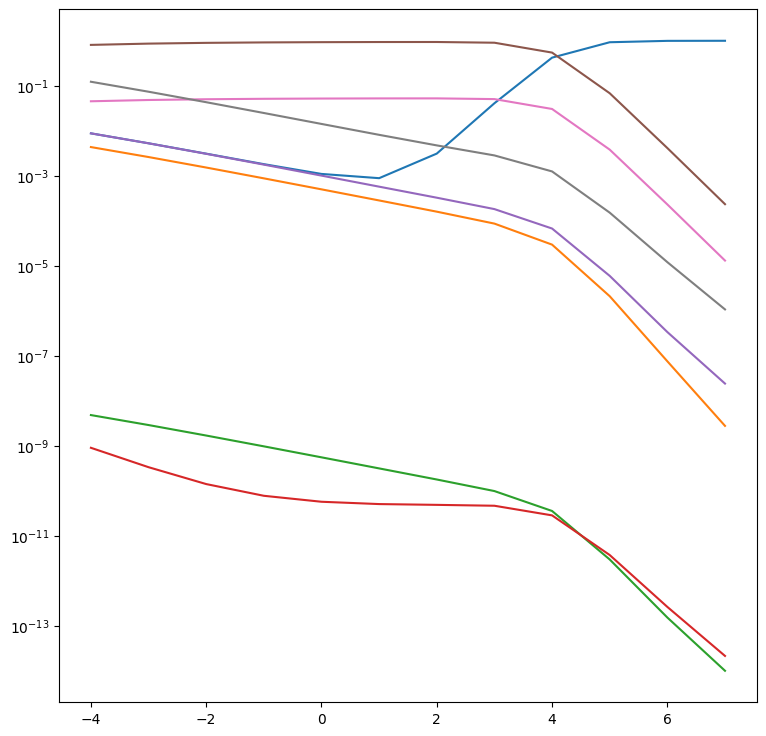

In [19]:
fo2=np.linspace(-4,7,12) #Define an array of fo2 values
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(9,9)) #Create plot
for i in range (10): #Plot over all 10 elements
    axes.semilogy(fo2,Molar_fraction[i,6,:]) #Plot each elemental abudence profiles

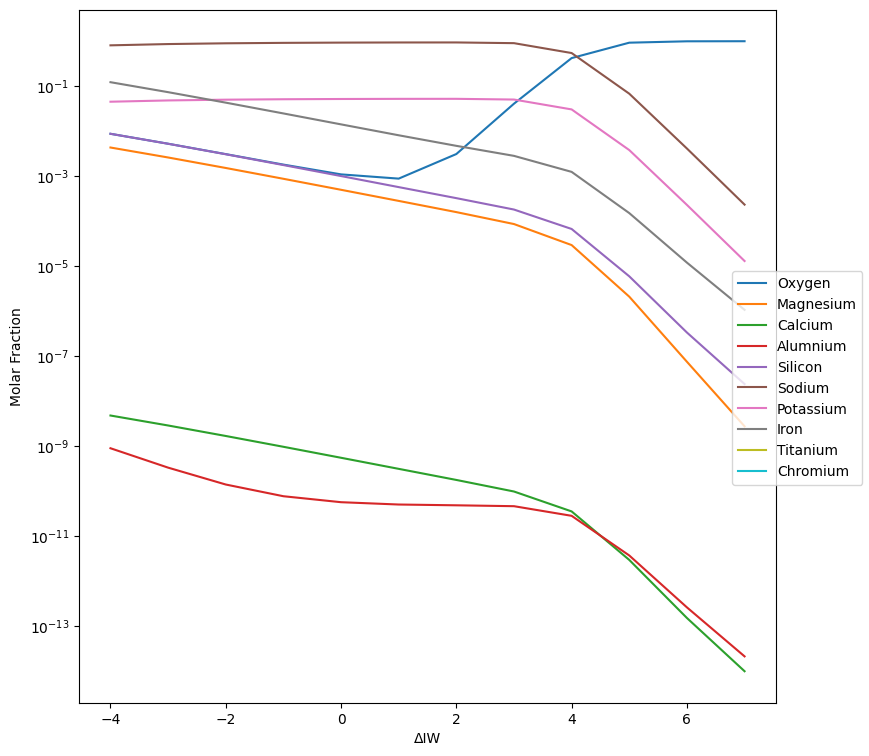

In [50]:
elements=['Oxygen','Magnesium','Calcium','Alumnium','Silicon','Sodium','Potassium','Iron','Titanium','Chromium'] #Label the elements
fig , axes = plt.subplots(nrows=1,ncols=1,figsize=(9,9)) #Create figure
for i in range (10): #Loop over the 10 elements
    axes.semilogy(fo2,Molar_fraction[i,6,:],label=elements[i]) #Plot each element
#Remove duplicate elements
handles, labels = plt.gca().get_legend_handles_labels() 
by_label = dict(zip(labels, handles))
axes.set_xlabel('\u0394IW') #Label the x-axis
axes.set_ylabel('Molar Fraction') #Label the y-axis
fig.legend(loc='center right') #Add a legend
plt.savefig('Molar frac vs fo2.png') #Save the figure

In [45]:
Column_density = np.zeros((34,101,12))
for i in range(12):
        Column_density[:,:,i]=col_densityt_dataframes[i].iloc[:,0:101]

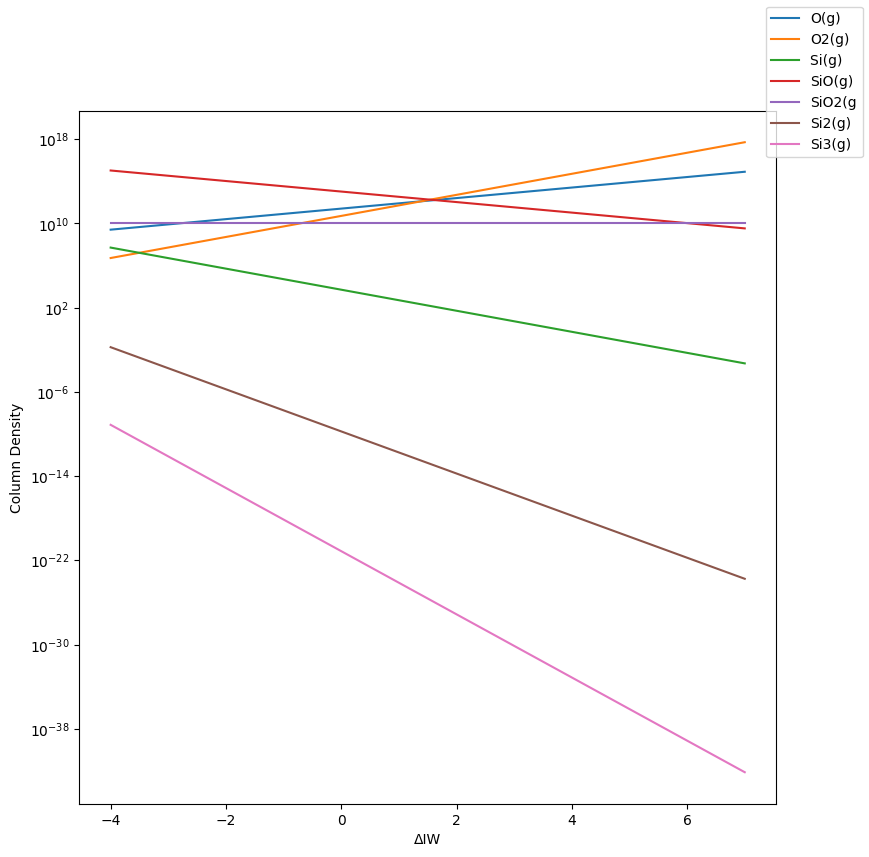

In [49]:
o2=np.linspace(-4,7,12)
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(9,9))
Vapo_species=['O(g)', 'O2(g)', 'Mg(g)', 'MgO(g)', 'Mg2(g)', 'Ca(g) ', 'CaO(g)', 'Ca2(g)', 'Al(g) ', 'AlO(g)', 'AlO2(g)', 'Al2(g)', 'Al2O(g)', 'Al2O2(g)', 'Si(g) ', 'SiO(g)', 'SiO2(g', 'Si2(g)', 'Si3(g)', 'Na(g) ', 'NaO(g)', 'Na2(g)', 'K(g)  ', 'KO(g) ', 'K2(g) ', 'Fe(g) ', 'FeO(g)', 'TiO(g)', 'Ti(g) ', 'TiO2(g)', 'Cr(g) ', 'CrO(g)', 'CrO2(g)', 'CrO3(g)']
Vapos=[ 'O2(g)','O(g)','NaO(g)','Na(g)','SiO2(g)','FeO(g)','KO(g)','MgO(g)','K(g)','SiO(g)','AlO2(g)','Mg(g)','Fe(g)','AlO(g)','CaO(g)','Na2(g)','Ca(g)','Al(g)','K2(g)','Al2O2(g)']
col_densityt_dataframes
for i in (0,1,14,15,16,17,18):
    axes.semilogy(fo2,Column_density[i,6,:],label=Vapo_species[i])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axes.set_xlabel('\u0394IW')
axes.set_ylabel('Column Density')
fig.legend()
plt.savefig('Column density vs fo2 for O and Si.png')

In [33]:
col_densityt_dataframes[0]

,1500.0,1515.0,1530.0,1545.0,1560.0,1575.0,1590.0,1605.0,1620.0,1635.0,...,2940.0,2955.0,2970.0,2985.0,3000.0,Species name,Species type,Species type without duplicates,Color,Linestyle
O(g),2.459100e+08,3.706705e+08,5.542114e+08,8.221315e+08,1.210276e+09,1.768480e+09,2.565546e+09,3.695826e+09,5.287862e+09,7.515665e+09,...,1.399008e+17,1.554318e+17,1.724991e+17,1.912352e+17,2.117826e+17,O(g),Oxygen,Oxygen,grey,-
O2(g),4.797273e+05,7.279998e+05,1.095546e+06,1.635305e+06,2.421804e+06,3.559178e+06,5.191895e+06,7.518984e+06,1.081278e+07,1.544349e+07,...,3.032095e+14,3.364518e+14,3.729270e+14,4.129079e+14,4.566862e+14,O2(g),Oxygen,,grey,--
Mg(g),1.131621e+14,1.648009e+14,2.381097e+14,3.413946e+14,4.858438e+14,6.864232e+14,9.630168e+14,1.341869e+15,1.857398e+15,2.554467e+15,...,4.885603e+21,5.316359e+21,5.779360e+21,6.276555e+21,6.809981e+21,Mg(g),Magnesium,Magnesium,blue,-.
MgO(g),2.291263e+07,3.868440e+07,6.461182e+07,1.067925e+08,1.747246e+08,2.830603e+08,4.541904e+08,7.220187e+08,1.137428e+09,1.776126e+09,...,1.421312e+18,1.605583e+18,1.811215e+18,2.040378e+18,2.295430e+18,MgO(g),Magnesium,,blue,:
Mg2(g),6.674035e+02,1.381209e+03,2.814185e+03,5.647702e+03,1.116894e+04,2.177513e+04,4.186964e+04,7.943295e+04,1.487416e+05,2.750146e+05,...,2.378129e+17,2.781591e+17,3.247294e+17,3.783850e+17,4.400917e+17,Mg2(g),Magnesium,,blue,-
Ca(g),4.209340e+07,6.799823e+07,1.087596e+08,1.722869e+08,2.703807e+08,4.204910e+08,6.482007e+08,9.907040e+08,1.501640e+09,2.257755e+09,...,3.316100e+17,3.712435e+17,4.150915e+17,4.635445e+17,5.170230e+17,Ca(g),Calcium,Calcium,black,--
CaO(g),1.452766e+02,2.658385e+02,4.799129e+02,8.551224e+02,1.504546e+03,2.615023e+03,4.491712e+03,7.627475e+03,1.280977e+04,2.128361e+04,...,2.384053e+14,2.743633e+14,3.152699e+14,3.617391e+14,4.144526e+14,CaO(g),Calcium,,black,-.
Ca2(g),8.990766e-10,2.282935e-09,5.684779e-09,1.389022e-08,3.332134e-08,7.852118e-08,1.818555e-07,4.141494e-07,9.278682e-07,2.046040e-06,...,9.385895e+09,1.160534e+10,1.431434e+10,1.761299e+10,2.162021e+10,Ca2(g),Calcium,,black,:
Al(g),6.264501e+06,1.119126e+07,1.976095e+07,3.450022e+07,5.957506e+07,1.017825e+08,1.720996e+08,2.880797e+08,4.775223e+08,7.840453e+08,...,1.101808e+19,1.273711e+19,1.470186e+19,1.694416e+19,1.949955e+19,Al(g),Alumnium,Alumnium,orange,-
AlO(g),1.890429e+05,3.372911e+05,5.947917e+05,1.037028e+06,1.788243e+06,3.050783e+06,5.150848e+06,8.609094e+06,1.424857e+07,2.335818e+07,...,2.886577e+17,3.333507e+17,3.843784e+17,4.425539e+17,5.087834e+17,AlO(g),Alumnium,,orange,--
